In [1]:
import json
import math
import re
import os
import os.path as path
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
rootPath = path.join('..', 'CQI_Data', 'arabica')

In [3]:
readRandomIdPath = path.join(rootPath, 'arabica_random_id.json')

coffeeBasicPath = path.join(rootPath, 'cqi_db_arabica.json')
coffeeGradePath = path.join(rootPath, 'arabica_random_id_grades.json')
coffeeGreenPath = path.join(rootPath, 'arabica_random_id_greens.json')

writeCombDataPath = path.join(rootPath, 'arabica_combine_data.json')

randomIds = basics = grades = greens = []

outputs = []

df = []

In [4]:
print(rootPath)
print(readRandomIdPath)
print(coffeeBasicPath)
print(coffeeGradePath)
print(coffeeGreenPath)

..\CQI_Data\arabica
..\CQI_Data\arabica\arabica_random_id.json
..\CQI_Data\arabica\cqi_db_arabica.json
..\CQI_Data\arabica\arabica_random_id_grades.json
..\CQI_Data\arabica\arabica_random_id_greens.json


In [5]:
with open(readRandomIdPath, 'r') as f:
    randomIds = json.load(f)

with open(coffeeBasicPath, 'r') as f:
    basics = json.load(f)

with open(coffeeGradePath, 'r') as f:
    grades = json.load(f)

with open(coffeeGreenPath, 'r') as f:
    greens = json.load(f)

In [6]:
df_base = pd.DataFrame(basics)
df_base

,id,grade_id,random_id,species,origin,icp,stage,company,name,address,...,species_title,origin_title,stage_title,createdBy_name,createdBy_username,country_title,completed_desc,isCertified,certifiedIcon,icp_data
0,None,None,840458,1,66,4,6,Consejo Salvadoreño del Café,Consejo Salvadoreño del Café,Final 1a. av. Nte. y 13 Calle Pte.,...,Arabica,El Salvador,Completed,Consejo Salvadoreño del Café,consejo,El Salvador,"March 3rd, 2023",True,https://database.coffeeinstitute.org/api/s3pro...,"{'id': 4, 'title': 'Salvadoran Coffee Council'..."
1,None,None,723401,1,160,10,6,Exportadora Atlantic S.A,"Exportadora Atlantic, S.A.","Pista Jean paúl Genie, Edificio corporativo es...",...,Arabica,Nicaragua,Completed,"Exportadora Atlantic, S.A.",Expasa,Nicaragua,"March 3rd, 2023",False,,"{'id': 10, 'title': 'Asociación de Cafés Espec..."
2,None,None,387213,1,115,9,6,IBERO (K) LTD,JUDITH,P.O BOX 47882,...,Arabica,Kenya,Completed,Judith Murimi,Judy-Murimi,Kenya,"February 28th, 2023",True,https://database.coffeeinstitute.org/api/s3pro...,"{'id': 9, 'title': 'Kenya Coffee Traders Assoc..."
3,None,None,614786,1,93,6,6,"OLAM AGRO GUATEMALA, S.A.","OLAM AGRO GUATEMALA, S.A.","13 calle 3-40 zona 10 Edificio Atlantis, Nivel...",...,Arabica,Guatemala,Completed,Yesica Alejandra Martìnez Vàsquez,yesicaalejandramartnezvsquez,Guatemala,"February 23rd, 2023",True,https://database.coffeeinstitute.org/api/s3pro...,"{'id': 6, 'title': 'Asociacion Nacional Del Ca..."
4,None,None,858598,1,48,47,6,ECOM COLOMBIA,Raúl Vargas,Calle 78 # 8 - 32,...,Arabica,Colombia,Completed,Raúl Vargas,raulvargas,Colombia,"February 22nd, 2023",False,,"{'id': 47, 'title': 'ASOCIACIÓN COLOMBIANA PAR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,None,None,44428,1,220,1,6,,N/A,"Mutipurpose Building, Doi Tung Villa,,",...,Arabica,Thailand,Completed,Doi Tung Development Project,doitung,Thailand,"April 13th, 2010",True,https://database.coffeeinstitute.org/api/s3pro...,"{'id': 1, 'title': 'Specialty Coffee Associati..."
2126,None,None,470291,1,220,1,6,,N/A,"Mutipurpose Building, Doi Tung Villa,,",...,Arabica,Thailand,Completed,Doi Tung Development Project,doitung,Thailand,"April 13th, 2010",True,https://database.coffeeinstitute.org/api/s3pro...,"{'id': 1, 'title': 'Specialty Coffee Associati..."
2127,None,None,647734,1,143,1,6,,Masamichi Hiroike,"Dojima 1-2-5,",...,Arabica,Mexico,Completed,Masamichi Hiroike,mhiroike,Japan,"April 9th, 2010",False,,"{'id': 1, 'title': 'Specialty Coffee Associati..."
2128,None,None,486809,1,143,1,6,,Masamichi Hiroike,"Dojima 1-2-5,",...,Arabica,Mexico,Completed,Masamichi Hiroike,mhiroike,Japan,"April 9th, 2010",False,,"{'id': 1, 'title': 'Specialty Coffee Associati..."


In [7]:
# 칼럼 리스트를 모두 출력해서 필요한 칼럼을 파악
df_base.columns

Index(['id', 'grade_id', 'random_id', 'species', 'origin', 'icp', 'stage',
       'company', 'name', 'address', 'city', 'state', 'zip', 'country',
       'phone', 'url', 'lot', 'bags', 'weight', 'weight_unit', 'ico', 'region',
       'altitude', 'altitude_unit', 'varietal', 'processing', 'harvest',
       'producer', 'farm', 'farm_lat', 'farm_long', 'mill', 'ship', 'carrier',
       'iam', 'thiscoffee', 'reason', 'buyer', 'offer', 'description',
       'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'invoice',
       'grade', 'completed', 'status', 'createdBy', 'created', 'viewable',
       'green_pass', 'sample_available', 'cert_version', 'completed_icp',
       'other_varietals', 'other_processing', 'species_short', 'species_title',
       'origin_title', 'stage_title', 'createdBy_name', 'createdBy_username',
       'country_title', 'completed_desc', 'isCertified', 'certifiedIcon',
       'icp_data'],
      dtype='object')

In [8]:
# 필요한 칼럼만 남기고 나머지 칼럼은 drop
df_base_a = df_base.drop(['id', 'grade_id', 'icp', 'stage',
       'company', 'name', 'address', 'city', 'state', 'zip', 'country',
       'phone', 'url', 'lot', 'bags', 'weight', 'weight_unit', 'ico', 'region',
       'altitude', 'altitude_unit', 
       'producer', 'mill', 'ship', 'carrier', 'farm', 'farm_lat', 'farm_long',
       'iam', 'thiscoffee', 'reason', 'buyer', 'offer', 'description',
       'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'invoice', 
       'completed', 'status', 'createdBy', 'created', 'viewable',
       'sample_available', 'cert_version', 'completed_icp',
       'species_title',
       'origin_title', 'stage_title', 'createdBy_name', 'createdBy_username',
       'country_title', 'completed_desc', 'isCertified', 'certifiedIcon',
       'icp_data'], axis='columns')
df_base_a

,random_id,species,origin,varietal,processing,harvest,grade,green_pass,other_varietals,other_processing,species_short
0,840458,1,66,4,2.0,2022 / 2023,82.5,Y,,,arabica
1,723401,1,160,44,1.0,2022 / 2023,80,N,,,arabica
2,387213,1,115,29,2.0,2022 / 2023,85.25,Y,,,arabica
3,614786,1,93,5,2.0,2022 / 2023,85,Y,,,arabica
4,858598,1,48,6,2.0,2022 / 2023,83.83,N,,,arabica
...,...,...,...,...,...,...,...,...,...,...,...
2125,44428,1,220,0,NaN,N/A,82.92,Y,None,None,arabica
2126,470291,1,220,26,NaN,N/A,80.92,Y,None,None,arabica
2127,647734,1,143,37,NaN,08/09 crop,76.75,Y,None,None,arabica
2128,486809,1,143,37,NaN,08/09 crop,79.17,N,None,None,arabica


In [9]:
df_grade = pd.DataFrame(grades)
df_grade

,has_aroma_defect,has_flavor_defect,has_uniformity_defect,has_cleancup_defect,has_sweetness_defect,needs_grader,species,grade,grades,coffee,permissions,icp
0,False,False,False,False,False,False,1,"{'aroma': 7.666666666666667, 'flavor': 7.33333...","[{'id': 8797, 'coffee': 301675, 'grader': 2555...","{'id': 296811, 'grade_id': 301675, 'random_id'...",[],"{'id': 4, 'title': 'Salvadoran Coffee Council'..."
1,False,False,False,False,False,False,1,"{'aroma': 7.333333333333333, 'flavor': 7.08333...","[{'id': 8787, 'coffee': 285871, 'grader': 2230...","{'id': 296803, 'grade_id': 285871, 'random_id'...",[],"{'id': 10, 'title': 'Asociación de Cafés Espec..."
2,False,False,False,False,False,False,1,"{'aroma': 8.166666666666666, 'flavor': 7.75, '...","[{'id': 8778, 'coffee': 409405, 'grader': 3053...","{'id': 296794, 'grade_id': 409405, 'random_id'...",[],"{'id': 9, 'title': 'Kenya Coffee Traders Assoc..."
3,False,False,False,False,False,False,1,"{'aroma': 7.666666666666667, 'flavor': 8, 'aft...","[{'id': 8784, 'coffee': 547465, 'grader': 1717...","{'id': 296799, 'grade_id': 547465, 'random_id'...",[],"{'id': 6, 'title': 'Asociacion Nacional Del Ca..."
4,False,False,False,False,False,False,1,"{'aroma': 7.916666666666667, 'flavor': 7.75, '...","[{'id': 8754, 'coffee': 397736, 'grader': 1424...","{'id': 296776, 'grade_id': 397736, 'random_id'...",[],"{'id': 47, 'title': 'ASOCIACIÓN COLOMBIANA PAR..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2125,False,False,False,False,False,False,1,"{'aroma': 7.416666666666667, 'flavor': 7.58333...","[{'id': 13, 'coffee': 5225, 'grader': 601, 'as...","{'id': 293187, 'grade_id': 5225, 'random_id': ...",[],"{'id': 1, 'title': 'Specialty Coffee Associati..."
2126,False,False,False,False,False,False,1,"{'aroma': 7.666666666666667, 'flavor': 7.58333...","[{'id': 17, 'coffee': 746339, 'grader': 603, '...","{'id': 293185, 'grade_id': 746339, 'random_id'...",[],"{'id': 1, 'title': 'Specialty Coffee Associati..."
2127,False,False,False,False,False,False,1,"{'aroma': 6.666666666666667, 'flavor': 6.33333...","[{'id': 7, 'coffee': 867325, 'grader': 542, 'a...","{'id': 293176, 'grade_id': 867325, 'random_id'...",[],"{'id': 1, 'title': 'Specialty Coffee Associati..."
2128,False,False,False,False,False,False,1,"{'aroma': 6.75, 'flavor': 6.75, 'after': 6.833...","[{'id': 10, 'coffee': 18337, 'grader': 542, 'a...","{'id': 293177, 'grade_id': 18337, 'random_id':...",[],"{'id': 1, 'title': 'Specialty Coffee Associati..."


In [10]:
df_grade.columns

Index(['has_aroma_defect', 'has_flavor_defect', 'has_uniformity_defect',
       'has_cleancup_defect', 'has_sweetness_defect', 'needs_grader',
       'species', 'grade', 'grades', 'coffee', 'permissions', 'icp'],
      dtype='object')

In [11]:
df_grade = df_grade.drop(['has_aroma_defect', 'has_flavor_defect', 'has_uniformity_defect',
       'has_cleancup_defect', 'has_sweetness_defect', 'needs_grader',
       'species', 'permissions', 'icp'], axis='columns')
df_grade = df_grade.fillna('')
df_grade

,grade,grades,coffee
0,"{'aroma': 7.666666666666667, 'flavor': 7.33333...","[{'id': 8797, 'coffee': 301675, 'grader': 2555...","{'id': 296811, 'grade_id': 301675, 'random_id'..."
1,"{'aroma': 7.333333333333333, 'flavor': 7.08333...","[{'id': 8787, 'coffee': 285871, 'grader': 2230...","{'id': 296803, 'grade_id': 285871, 'random_id'..."
2,"{'aroma': 8.166666666666666, 'flavor': 7.75, '...","[{'id': 8778, 'coffee': 409405, 'grader': 3053...","{'id': 296794, 'grade_id': 409405, 'random_id'..."
3,"{'aroma': 7.666666666666667, 'flavor': 8, 'aft...","[{'id': 8784, 'coffee': 547465, 'grader': 1717...","{'id': 296799, 'grade_id': 547465, 'random_id'..."
4,"{'aroma': 7.916666666666667, 'flavor': 7.75, '...","[{'id': 8754, 'coffee': 397736, 'grader': 1424...","{'id': 296776, 'grade_id': 397736, 'random_id'..."
...,...,...,...
2125,"{'aroma': 7.416666666666667, 'flavor': 7.58333...","[{'id': 13, 'coffee': 5225, 'grader': 601, 'as...","{'id': 293187, 'grade_id': 5225, 'random_id': ..."
2126,"{'aroma': 7.666666666666667, 'flavor': 7.58333...","[{'id': 17, 'coffee': 746339, 'grader': 603, '...","{'id': 293185, 'grade_id': 746339, 'random_id'..."
2127,"{'aroma': 6.666666666666667, 'flavor': 6.33333...","[{'id': 7, 'coffee': 867325, 'grader': 542, 'a...","{'id': 293176, 'grade_id': 867325, 'random_id'..."
2128,"{'aroma': 6.75, 'flavor': 6.75, 'after': 6.833...","[{'id': 10, 'coffee': 18337, 'grader': 542, 'a...","{'id': 293177, 'grade_id': 18337, 'random_id':..."


In [12]:
rows = df_grade.shape[0]
grade_keys = list(df_grade.loc[0].get('grade').keys())
grades_keys = list(df_grade.loc[0].get('grades')[0].keys())
coffee_keys = list(df_grade.loc[0].get('coffee').keys())

print(rows)
print(grade_keys)
print(grades_keys)
print(coffee_keys)

2130
['aroma', 'flavor', 'after', 'acidity', 'body', 'mouthfeel', 'balance', 'uniformity', 'clean', 'sweet', 'overall', 'defect', 'total', 'pass']
['id', 'coffee', 'grader', 'assigned', 'graded', 'approved', 'aroma', 'aroma_description', 'aroma_defects', 'aroma_notes', 'flavor', 'flavor_description', 'flavor_defects', 'flavor_notes', 'after', 'after_notes', 'acidity', 'acidity_notes', 'body', 'body_notes', 'balance', 'balance_notes', 'mouthfeel', 'mouthfeel_notes', 'uniformity', 'uniformity_defects', 'uniformity_notes', 'clean', 'clean_defects', 'clean_notes', 'sweet', 'sweet_defects', 'sweet_notes', 'overall', 'overall_notes', 'defect', 'defects_intensity', 'defects_cup', 'defects_defect', 'defects_description', 'roast', 'notes', 'regrade', 'out_of_calibration', 'invoice', 'port', 'status', 'grader_name', 'grader_username', 'assigned_desc', 'aroma_description_title', 'flavor_description_title', 'defects_defect_title']
['id', 'grade_id', 'random_id', 'species', 'origin', 'icp', 'stage'

In [13]:
df_grade_a = pd.DataFrame()

try:
    for row in range(rows):
        if df_grade.get('coffee').loc[row] != '':
            coffee_temp = df_grade.get('coffee').loc[row]
            df_temp_coffee = pd.DataFrame([[coffee_temp.get('random_id'), coffee_temp.get('id'), coffee_temp.get('grade_id')]], columns=['random_id', 'id', 'grade_id'])
        else:
            df_temp_coffee = pd.DataFrame([['', '', '']], columns=['random_id', 'id', 'grade_id'])

        if df_grade.get('grade').loc[row] != '':
            df_temp_grade = pd.DataFrame.from_dict(df_grade.loc[row].get('grade'), orient='index').T
        else:
            df_temp_grade = pd.DataFrame()

        if len(df_grade.get('grades').loc[row]) != 0 and df_grade.get('grades').loc[row] != '':
            df_temp_desc = pd.DataFrame(columns=['aroma_desc', 'aroma_notes', 'flavor_desc', 'flavor_notes'])

            df_temp_desc.loc[0] = ''
            df_temp_desc['aroma_desc'].loc[0] = list()
            df_temp_desc['aroma_notes'].loc[0] = list()
            df_temp_desc['flavor_desc'].loc[0] = list()
            df_temp_desc['flavor_notes'].loc[0] = list()

            for individual_grade in df_grade['grades'].loc[row]:
                if individual_grade.get('aroma_description') is not None:
                    df_temp_desc['aroma_desc'].loc[0].append(str(individual_grade.get('aroma_description')))
                
                if individual_grade.get('aroma_notes') is not None:
                    df_temp_desc['aroma_notes'].loc[0].extend(s2.lower() for s2 in (s1.strip() for s1 in re.split('[,.\n]', individual_grade.get('aroma_notes')) if s1))
                
                if individual_grade.get('flavor_description') is not None:
                    df_temp_desc['flavor_desc'].loc[0].append(str(individual_grade.get('flavor_description')))
                
                if individual_grade.get('flavor_notes') is not None:
                    df_temp_desc['flavor_notes'].loc[0].extend(s2.lower() for s2 in (s1.strip() for s1 in re.split('[,.\n]', individual_grade.get('flavor_notes')) if s1))

        else:
            df_temp_desc = pd.DataFrame(columns=['grade_id', 'aroma_desc', 'aroma_notes', 'flavor_desc', 'flavor_notes'])

            df_temp_desc.loc[0] = ''

        df_temp = pd.merge(df_temp_grade, df_temp_desc, left_index=True, right_index=True)
        df_temp = pd.merge(df_temp, df_temp_coffee, left_index=True, right_index=True)

        df_grade_a = pd.concat([df_grade_a, df_temp], ignore_index=True)
except Exception as e:
    print(row, e)


In [14]:
df_temp_grade

,aroma,flavor,after,acidity,body,mouthfeel,balance,uniformity,clean,sweet,overall,defect,total,pass
0,7.166667,7.166667,7,7,7.25,0,6.916667,10,10,10,7.166667,0,79.67,0


In [15]:
df_temp_desc

,aroma_desc,aroma_notes,flavor_desc,flavor_notes
0,"[0, 0, 0]",[],"[0, 0, 0]",[]


In [16]:
df_temp_coffee

,random_id,id,grade_id
0,721280,293184,993241


In [17]:
df_grade.loc[689]

grade     
grades    
coffee    
Name: 689, dtype: object

In [18]:
if 'coffee' in df_grade.loc[689]:
    print(df_grade.get('coffee').loc[689])
else:
    print("aaaa")

In [19]:
df_grade.fillna('').loc[689]

grade     
grades    
coffee    
Name: 689, dtype: object

In [20]:
df_grade_a

,aroma,flavor,after,acidity,body,mouthfeel,balance,uniformity,clean,sweet,...,pass,aroma_desc,aroma_notes,flavor_desc,flavor_notes,random_id,id,grade_id,grade_id_x,grade_id_y
0,7.666667,7.333333,7.166667,7.666667,7.833333,0,7.5,10,10,10,...,1,"[17, 6, 45]","[sweet, honey, chocolat, almonds, caramel, pea...","[14, 45, 45]","[chocolat, orange skin, brown sugar, bitter]",840458,296811,301675.0,NaN,NaN
1,7.333333,7.083333,6.75,7.166667,7.416667,0,7.166667,10,10,10,...,1,"[36, 1, 14]","[caramelo, nueces, almendras, rosas, floral, m...","[44, 6, 6]","[poco dulce, astringente, chocolate blanco, ca...",723401,296803,285871.0,NaN,NaN
2,8.166667,7.75,7.833333,7.583333,7.916667,0,8,10,10,10,...,1,"[14, 17, 14]","[honey, floral, nutty, fruity, sweet, citrus, ...","[17, 17, 14]","[floral, dark chocolate, orange, spicy, butter...",387213,296794,409405.0,NaN,NaN
3,7.666667,8,7.75,7.916667,8,0,7.833333,10,10,10,...,1,"[45, 45, 45]","[dulce, miel, chocolate, caramelo, caramelo]","[1, 6, 6]","[manzana roja, miel, vainilla, caramelo, caram...",614786,296799,547465.0,NaN,NaN
4,7.916667,7.75,7.416667,7.583333,7.916667,0,7.666667,10,10,10,...,1,"[14, 14, 6]","[panela, mantequilla, chocolate oscuro, panela...","[27, 14, 6]","[moras sutil, melado, panela, caramel, chocola...",858598,296776,397736.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,7.416667,7.583333,7.5,7.166667,7.5,0,8,10,10,10,...,1,"[0, 0, 0]",[],"[0, 0, 0]",[],44428,293187,5225.0,NaN,NaN
2125,7.666667,7.583333,7.333333,7.333333,7.166667,0,7,10,10,10,...,1,"[0, 0, 0]",[],"[0, 0, 0]",[],470291,293185,746339.0,NaN,NaN
2126,6.666667,6.333333,6.416667,6.833333,7,0,6.916667,10,10,10,...,0,"[0, 0, 0]","[baggy, baggy but creamy]","[0, 0, 0]","[baggy, woody, grainy, cereal, rough, baggy, b...",647734,293176,867325.0,NaN,NaN
2127,6.75,6.75,6.833333,7.25,7.583333,0,7.083333,10,10,10,...,0,"[0, 0, 0]","[baggy, woody, old, rough, sweet dank dry, swe...","[0, 0, 0]","[predominately baggy with some chocolate, neut...",486809,293177,18337.0,NaN,NaN


In [21]:
df_out = pd.merge(df_base_a, df_grade_a, left_on='random_id', right_on='random_id', how='outer')
df_out

,random_id,species,origin,varietal,processing,harvest,grade,green_pass,other_varietals,other_processing,...,total,pass,aroma_desc,aroma_notes,flavor_desc,flavor_notes,id,grade_id,grade_id_x,grade_id_y
0,840458,1,66,4,2.0,2022 / 2023,82.5,Y,,,...,82.50,1,"[17, 6, 45]","[sweet, honey, chocolat, almonds, caramel, pea...","[14, 45, 45]","[chocolat, orange skin, brown sugar, bitter]",296811,301675.0,NaN,NaN
1,723401,1,160,44,1.0,2022 / 2023,80,N,,,...,80.00,1,"[36, 1, 14]","[caramelo, nueces, almendras, rosas, floral, m...","[44, 6, 6]","[poco dulce, astringente, chocolate blanco, ca...",296803,285871.0,NaN,NaN
2,387213,1,115,29,2.0,2022 / 2023,85.25,Y,,,...,85.25,1,"[14, 17, 14]","[honey, floral, nutty, fruity, sweet, citrus, ...","[17, 17, 14]","[floral, dark chocolate, orange, spicy, butter...",296794,409405.0,NaN,NaN
3,614786,1,93,5,2.0,2022 / 2023,85,Y,,,...,85.00,1,"[45, 45, 45]","[dulce, miel, chocolate, caramelo, caramelo]","[1, 6, 6]","[manzana roja, miel, vainilla, caramelo, caram...",296799,547465.0,NaN,NaN
4,858598,1,48,6,2.0,2022 / 2023,83.83,N,,,...,83.83,1,"[14, 14, 6]","[panela, mantequilla, chocolate oscuro, panela...","[27, 14, 6]","[moras sutil, melado, panela, caramel, chocola...",296776,397736.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,44428,1,220,0,NaN,N/A,82.92,Y,None,None,...,82.92,1,"[0, 0, 0]",[],"[0, 0, 0]",[],293187,5225.0,NaN,NaN
2126,470291,1,220,26,NaN,N/A,80.92,Y,None,None,...,80.92,1,"[0, 0, 0]",[],"[0, 0, 0]",[],293185,746339.0,NaN,NaN
2127,647734,1,143,37,NaN,08/09 crop,76.75,Y,None,None,...,76.75,0,"[0, 0, 0]","[baggy, baggy but creamy]","[0, 0, 0]","[baggy, woody, grainy, cereal, rough, baggy, b...",293176,867325.0,NaN,NaN
2128,486809,1,143,37,NaN,08/09 crop,79.17,N,None,None,...,79.17,0,"[0, 0, 0]","[baggy, woody, old, rough, sweet dank dry, swe...","[0, 0, 0]","[predominately baggy with some chocolate, neut...",293177,18337.0,NaN,NaN


In [22]:
df_out.columns

Index(['random_id', 'species', 'origin', 'varietal', 'processing', 'harvest',
       'grade', 'green_pass', 'other_varietals', 'other_processing',
       'species_short', 'aroma', 'flavor', 'after', 'acidity', 'body',
       'mouthfeel', 'balance', 'uniformity', 'clean', 'sweet', 'overall',
       'defect', 'total', 'pass', 'aroma_desc', 'aroma_notes', 'flavor_desc',
       'flavor_notes', 'id', 'grade_id', 'grade_id_x', 'grade_id_y'],
      dtype='object')

In [23]:
df_out_a = df_out.drop(['grade', 'grade_id_x', 'grade_id_y'], axis='columns')
df_out_a

,random_id,species,origin,varietal,processing,harvest,green_pass,other_varietals,other_processing,species_short,...,overall,defect,total,pass,aroma_desc,aroma_notes,flavor_desc,flavor_notes,id,grade_id
0,840458,1,66,4,2.0,2022 / 2023,Y,,,arabica,...,7.333333,0,82.50,1,"[17, 6, 45]","[sweet, honey, chocolat, almonds, caramel, pea...","[14, 45, 45]","[chocolat, orange skin, brown sugar, bitter]",296811,301675.0
1,723401,1,160,44,1.0,2022 / 2023,N,,,arabica,...,7.083333,0,80.00,1,"[36, 1, 14]","[caramelo, nueces, almendras, rosas, floral, m...","[44, 6, 6]","[poco dulce, astringente, chocolate blanco, ca...",296803,285871.0
2,387213,1,115,29,2.0,2022 / 2023,Y,,,arabica,...,8,0,85.25,1,"[14, 17, 14]","[honey, floral, nutty, fruity, sweet, citrus, ...","[17, 17, 14]","[floral, dark chocolate, orange, spicy, butter...",296794,409405.0
3,614786,1,93,5,2.0,2022 / 2023,Y,,,arabica,...,7.833333,0,85.00,1,"[45, 45, 45]","[dulce, miel, chocolate, caramelo, caramelo]","[1, 6, 6]","[manzana roja, miel, vainilla, caramelo, caram...",296799,547465.0
4,858598,1,48,6,2.0,2022 / 2023,N,,,arabica,...,7.583333,0,83.83,1,"[14, 14, 6]","[panela, mantequilla, chocolate oscuro, panela...","[27, 14, 6]","[moras sutil, melado, panela, caramel, chocola...",296776,397736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,44428,1,220,0,NaN,N/A,Y,None,None,arabica,...,7.75,0,82.92,1,"[0, 0, 0]",[],"[0, 0, 0]",[],293187,5225.0
2126,470291,1,220,26,NaN,N/A,Y,None,None,arabica,...,6.833333,0,80.92,1,"[0, 0, 0]",[],"[0, 0, 0]",[],293185,746339.0
2127,647734,1,143,37,NaN,08/09 crop,Y,None,None,arabica,...,6.583333,0,76.75,0,"[0, 0, 0]","[baggy, baggy but creamy]","[0, 0, 0]","[baggy, woody, grainy, cereal, rough, baggy, b...",293176,867325.0
2128,486809,1,143,37,NaN,08/09 crop,N,None,None,arabica,...,6.916667,0,79.17,0,"[0, 0, 0]","[baggy, woody, old, rough, sweet dank dry, swe...","[0, 0, 0]","[predominately baggy with some chocolate, neut...",293177,18337.0


In [24]:
df_out_a.to_json(writeCombDataPath, orient='records', indent=2)

In [ ]:
for row in range(rows):
    if float(df_out['total'].loc[row]) != float(df_out['grade'].loc[row] if df_out['grade'].loc[row] is not None else math.nan):
        print(row, df_out['grade'].loc[row], df_out['total'].loc[row])

In [ ]:
df_out.loc[1531]

In [ ]:
set(df_out_a['thiscoffee'])

In [35]:
tmp = {}
tmp2 = []
tmp3 = {}
for row in range(rows):
    if df_out_a['other_varietals'].loc[row] is not None and df_out_a['other_varietals'].loc[row] != '':
        tmp3[row] = df_out_a['other_varietals'].loc[row]
        tmp2.append(df_out_a['other_varietals'].loc[row])
        tmp[df_out_a['varietal'].loc[row]] = df_out_a['other_varietals'].loc[row]
    
tmp

{39: 'Castilla Naranja'}

In [ ]:
set(df_out_a['other_varietals'])

In [ ]:
tmp3

In [38]:
df_out_a['varietal'].loc[46]

39

In [49]:
df_out_b = df_out_a.drop(['random_id', 'varietal', 'harvest',
       'green_pass', 'other_varietals', 'other_processing',
       'species_short', 'aroma_desc', 'aroma_notes', 'flavor_desc',
       'flavor_notes', 'id', 'grade_id'], axis='columns')
df_out_b = df_out_b.fillna(float(-1))
df_out_b

,species,origin,processing,aroma,flavor,after,acidity,body,mouthfeel,balance,uniformity,clean,sweet,overall,defect,total,pass
0,1,66,2.0,7.666667,7.333333,7.166667,7.666667,7.833333,0.0,7.500000,10.0,10.0,10.0,7.333333,0.0,82.50,1.0
1,1,160,1.0,7.333333,7.083333,6.750000,7.166667,7.416667,0.0,7.166667,10.0,10.0,10.0,7.083333,0.0,80.00,1.0
2,1,115,2.0,8.166667,7.750000,7.833333,7.583333,7.916667,0.0,8.000000,10.0,10.0,10.0,8.000000,0.0,85.25,1.0
3,1,93,2.0,7.666667,8.000000,7.750000,7.916667,8.000000,0.0,7.833333,10.0,10.0,10.0,7.833333,0.0,85.00,1.0
4,1,48,2.0,7.916667,7.750000,7.416667,7.583333,7.916667,0.0,7.666667,10.0,10.0,10.0,7.583333,0.0,83.83,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1,220,-1.0,7.416667,7.583333,7.500000,7.166667,7.500000,0.0,8.000000,10.0,10.0,10.0,7.750000,0.0,82.92,1.0
2126,1,220,-1.0,7.666667,7.583333,7.333333,7.333333,7.166667,0.0,7.000000,10.0,10.0,10.0,6.833333,0.0,80.92,1.0
2127,1,143,-1.0,6.666667,6.333333,6.416667,6.833333,7.000000,0.0,6.916667,10.0,10.0,10.0,6.583333,0.0,76.75,0.0
2128,1,143,-1.0,6.750000,6.750000,6.833333,7.250000,7.583333,0.0,7.083333,10.0,10.0,10.0,6.916667,0.0,79.17,0.0


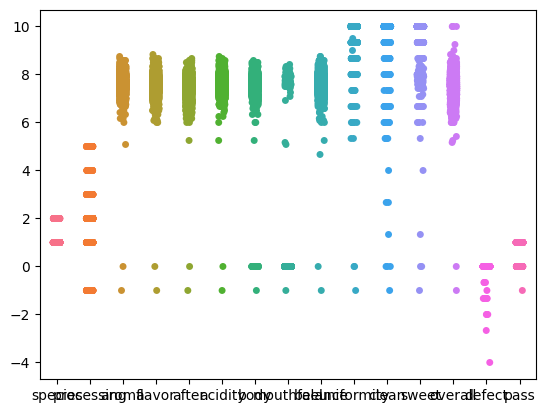

In [83]:
# heatmap by seaborn
df_sns = df_out_b.drop(['origin'], axis='columns')
ax = sns.stripplot(df_sns)

plt.show() 

In [44]:
df_out_b.shape

(2130, 17)

In [51]:
df_out.loc[df_out['origin'] == 30]

,random_id,species,origin,varietal,processing,harvest,grade,green_pass,other_varietals,other_processing,...,total,pass,aroma_desc,aroma_notes,flavor_desc,flavor_notes,id,grade_id,grade_id_x,grade_id_y
6,914711,1,30,20,1.0,2022 / 2023,83.25,Y,,,...,83.25,1,"[6, 6, 14]","[chocolate, caramelo, chocolate]","[14, 6, 14]","[frutas citricas, carameli, chocolate, caramelo]",296788,571796.0,NaN,NaN
7,508075,1,30,38,4.0,2022,84.75,Y,,Double Carbonic Maceration / Natural,...,84.75,1,"[17, 9, 26]","[maple, cassis, malt, jasmine, ginger, lemon t...","[45, 45, 45]","[tomato, brown sugar, earl gray, uva tea, caye...",296774,314678.0,NaN,NaN
8,319783,1,30,20,1.0,2022 / 2023,80.08,Y,,,...,80.08,1,"[6, 6, 14]","[caramelo, chocolate, dark chocolate and cacau]","[14, 40, 14]","[chocolate amargo, chocolate, dark chocolate a...",296782,109107.0,NaN,NaN
37,300191,1,30,39,3.0,2022,85.5,N,,,...,85.50,1,"[6, 14, 6]","[caramelo, chocolate and spice, caramelo]","[6, 6, 14]","[cremoso, caramel and floral, chocolate]",296718,244873.0,NaN,NaN
48,448890,1,30,39,1.0,2021,81.75,Y,Catucai,,...,81.75,1,"[45, 45, 45]","[nut, coco, cereal, tea, spice, roasted peanut]","[45, 45, 45]","[ume, nut, peanuts, nut, tea, dark chocolate, ...",296714,916941.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,710554,1,30,20,NaN,2011,81.83,Y,None,None,...,81.83,1,"[14, 14, 14]","[notes of chocolate and red fruits, chocolate]","[14, 14, 0]","[chocolate flavor, good / medium acidity, nice...",293466,842515.0,NaN,NaN
2053,158192,1,30,0,NaN,mmm,84.5,Y,None,None,...,84.50,1,"[0, 0, 0, 0]",[],"[14, 0, 0, 0]",[],293420,92382.0,NaN,NaN
2054,680549,1,30,0,NaN,TEST,84.5,N,None,None,...,84.50,1,"[9, 16, 5]",[],"[0, 1, 14]",[],293419,929049.0,NaN,NaN
2077,709854,1,30,38,NaN,2010,86.17,Y,None,None,...,86.17,1,"[0, 0, 0]",[],"[0, 0, 0]",[],293293,575819.0,NaN,NaN


In [56]:
df_out['origin'].value_counts()

93     283
143    270
48     241
30     211
217    198
99     108
71      87
54      79
235     78
219     63
160     59
220     56
230     55
243     55
104     43
66      39
115     37
103     26
45      21
175     18
152     15
133     11
176     11
121     10
236     10
172      8
97       6
35       5
173      4
64       4
180      4
186      3
259      1
141      1
250      1
132      1
258      1
110      1
112      1
56       1
249      1
63       1
51       1
0        1
Name: origin, dtype: int64